# Iris Dataset Analysis (Using EDA)
# Objective : To classify a given flower using the four features 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = pd.read_csv('iris.csv')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
x = iris.species.value_counts()


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

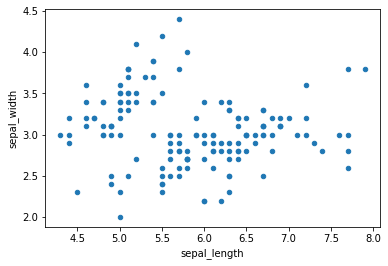

In [5]:
#Let's try making a plot.
iris.plot(kind = 'scatter',x='sepal_length', y='sepal_width')
#Since we can't make any sense out of this let's try seaborn

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


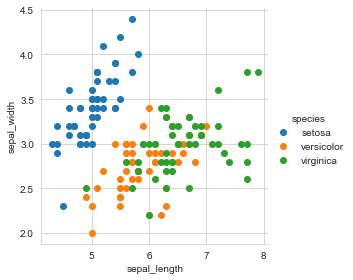

In [6]:
sns.set_style("whitegrid");
sns.FacetGrid(iris, hue="species", size=4) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend();
plt.show();

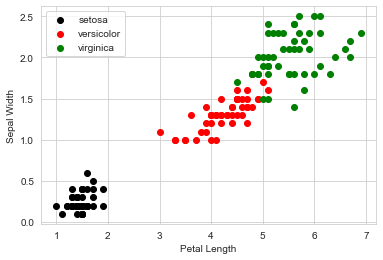

In [7]:


species = ['setosa','versicolor','virginica']
color = ['black','red','green']
for each in range(3):
    x = iris[iris['species'] == species[each]]
    plt.scatter(x['petal_length'],x['petal_width'],c = color[each],label = species[each])
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


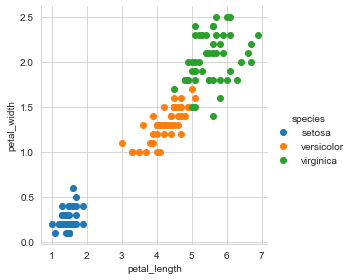

In [8]:
# i know that basic differences can be spotted using graphs 
# the first species i.e sertosa can be easily differentiated using the above graph
# but we know differentiate the latter


sns.set_style("whitegrid");
sns.FacetGrid(iris, hue="species", size=4) \
   .map(plt.scatter, "petal_length", "petal_width") \
   .add_legend();
plt.show();

## this graph is much better as there is no high overlap
## and therefore we can conclude that 'petal length and petal width
## can be as the distinguishing feature

<AxesSubplot:>

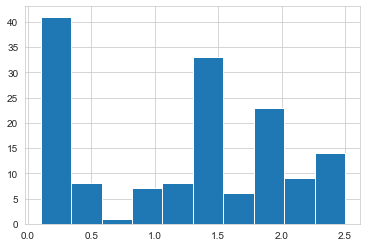

In [9]:
iris['petal_width'].hist()

<AxesSubplot:>

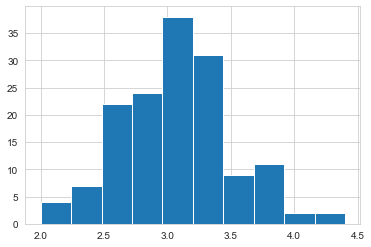

In [10]:
iris['sepal_width'].hist()

<AxesSubplot:>

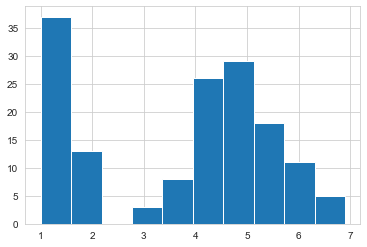

In [11]:
iris['petal_length'].hist()

<AxesSubplot:>

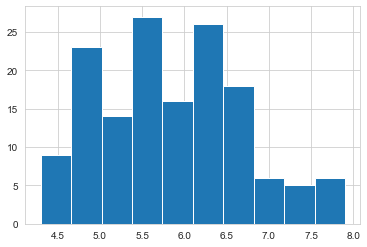

In [12]:
iris['sepal_length'].hist()

In [13]:
corr = iris.corr()

<AxesSubplot:>

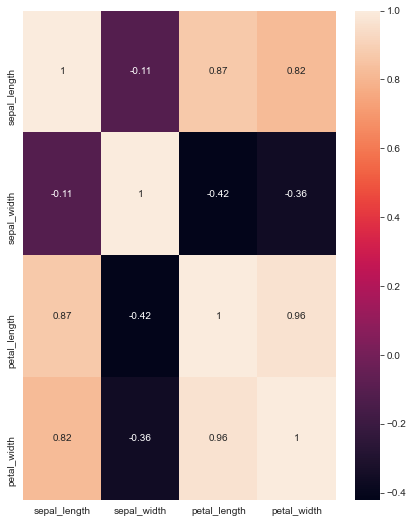

In [14]:
fig,ax = plt.subplots(figsize =(7,9))
iris.corr()
sns.heatmap(corr,annot = True,ax = ax)
## From this we can infer that petal length and petal width are good features

# Label Encoder
## In machine learning we find label values but we need to convert them into numeric forms

In [15]:
from  sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
iris['species'] = le.fit_transform(iris['species'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training Basics

## This is just for splitting the data

In [17]:
from sklearn.model_selection import train_test_split
X = iris.drop(columns = 'species')
Y = iris['species']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = .50)

## This is for training the model

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [19]:
model.fit(x_train,y_train)

LogisticRegression()

In [20]:
print('Accuracy :',model.score(x_test,y_test))

Accuracy : 0.9333333333333333


In [21]:
# knn k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier

In [22]:
model = KNeighborsClassifier()

In [23]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [24]:
print('Accuracy :',model.score(x_test,y_test))

Accuracy : 0.96


In [25]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [26]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [27]:
print('Accuracy :',model.score(x_test,y_test))

Accuracy : 0.9466666666666667
